# D02 Exploratory Data Analysis (EDA)

## Import packages

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, OrdinalEncoder
np.set_printoptions(precision=3)

%matplotlib inline


## Import excel "mpg.data.xlsx" as  Dataframe

In [46]:
df = pd.read_excel("mpg.data.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   1 non-null      object 
dtypes: float64(7), int64(4), object(2)
memory usage: 41.4+ KB


In [47]:
df.head(10)

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,NaN,NaN,NaN,NaN
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,NaN,NaN,NaN,NaN
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,NaN,NaN,NaN,NaN
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,NaN,NaN,NaN,NaN
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,NaN,NaN,NaN,NaN


The above nine columns with data:


1.   mpg (miles per gallon)
2.   cylinders (number of cylinders)
1.   displayments
2.   horsepower
1.   weight (in kilos)
2.   acceleration
1.   model year (only the last two digit of the year)
2.   origin (as number)
1.   car name (company[space]specific_model )-----------

So, 406 inputs and 9 columns in total. Important!! Columns 10-13 have not column names

**Delete empty columns**

In [48]:
df = df.dropna(axis=1, thresh= 200)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [49]:
df.head(10)

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


## Descriptive Statistics

In [50]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.50,23.0,29.000,46.6
cylinders,406.0,5.475369,1.712160,3.0,4.00,4.0,8.000,8.0
displayments,406.0,194.779557,104.922458,68.0,105.00,151.0,302.000,455.0
horsepower,400.0,105.082500,38.768779,46.0,75.75,95.0,130.000,230.0
weight,406.0,2979.413793,847.004328,1613.0,2226.50,2822.5,3618.250,5140.0
acceleration,406.0,15.519704,2.803359,8.0,13.70,15.5,17.175,24.8
model year,406.0,75.921182,3.748737,70.0,73.00,76.0,79.000,82.0
origin,406.0,1.568966,0.797479,1.0,1.00,1.0,2.000,3.0


In [51]:
df.nunique()

mpg             129
cylinders         5
displayments     83
horsepower       93
weight          356
acceleration     96
model year       13
origin            3
car name        312
dtype: int64

In [52]:
df.duplicated().sum()

0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


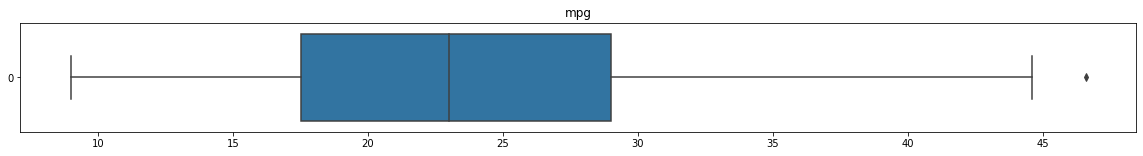

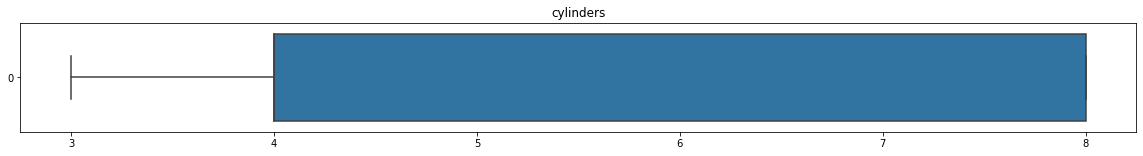

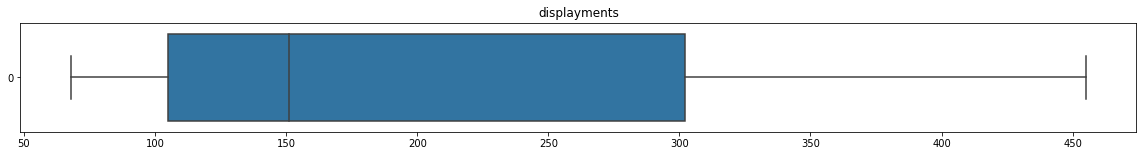

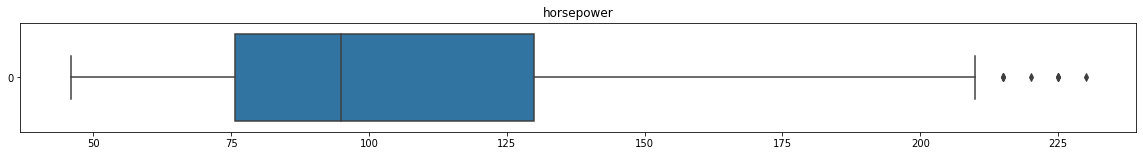

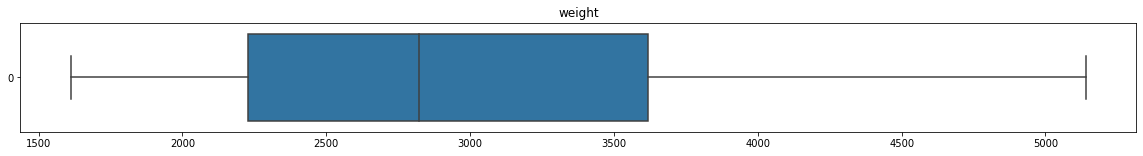

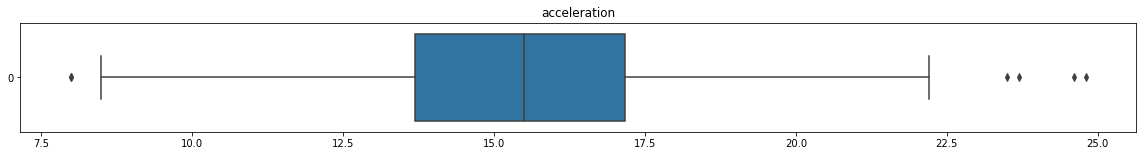

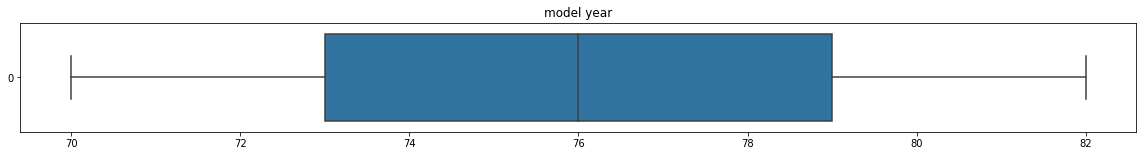

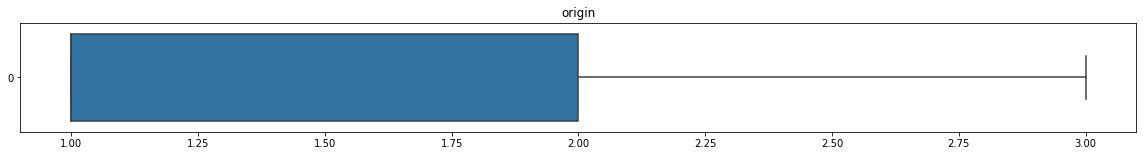

In [54]:
for i in df._get_numeric_data().columns:
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 2))
  sns.boxplot(data=df[i], orient="h", color='C0').set_title(i)
  plt.show()


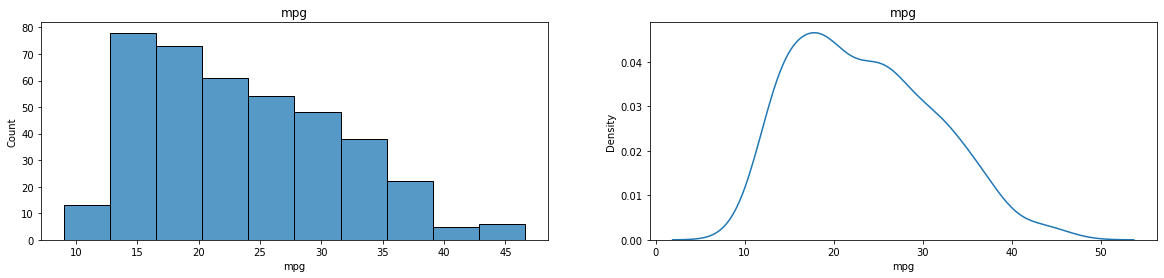

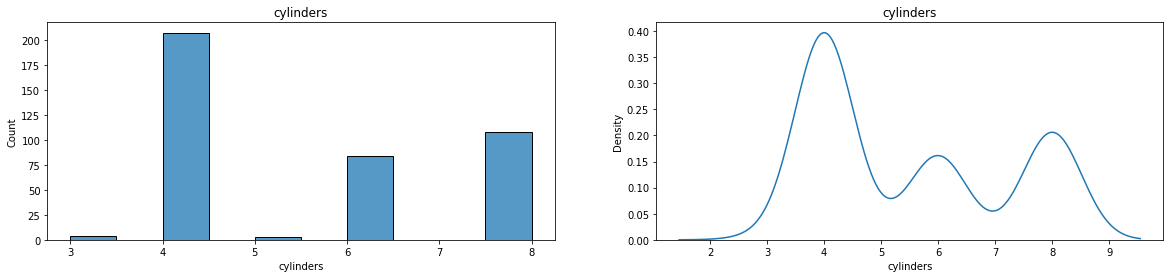

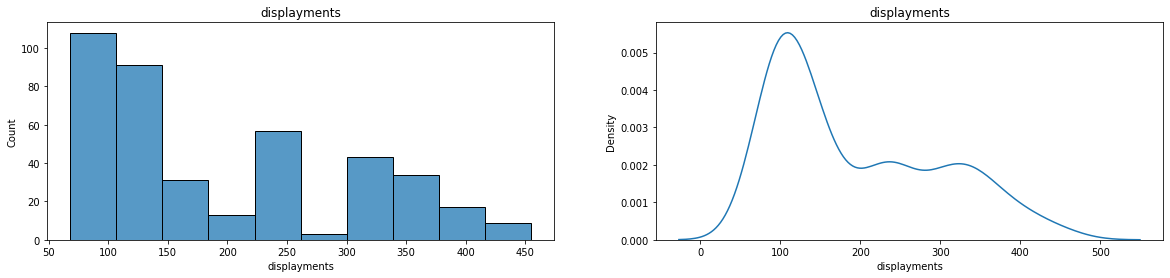

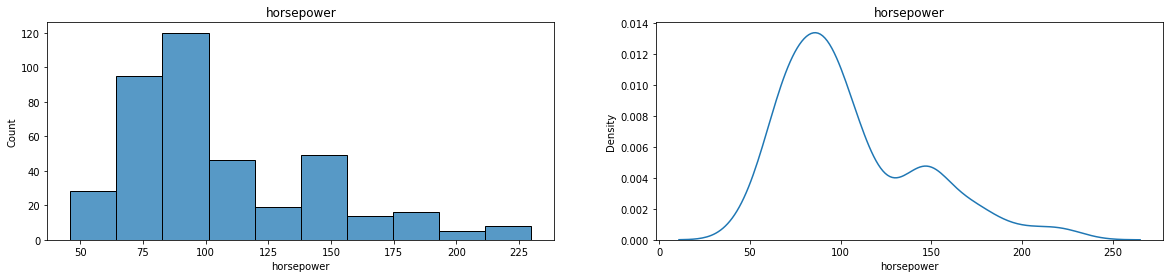

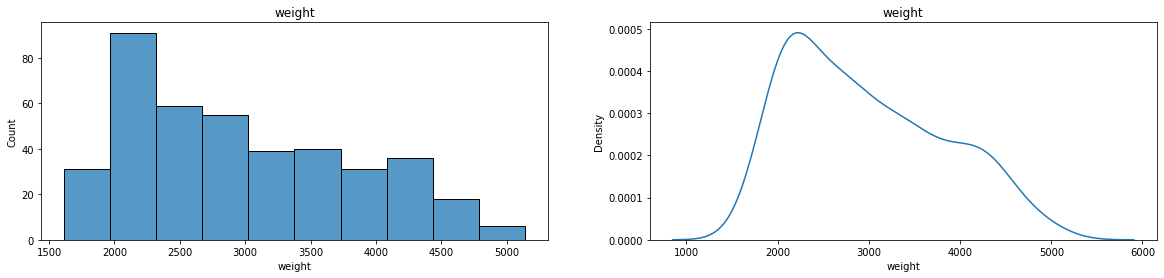

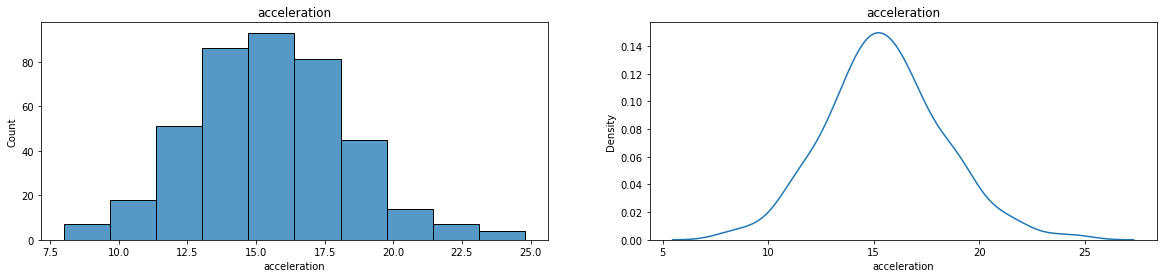

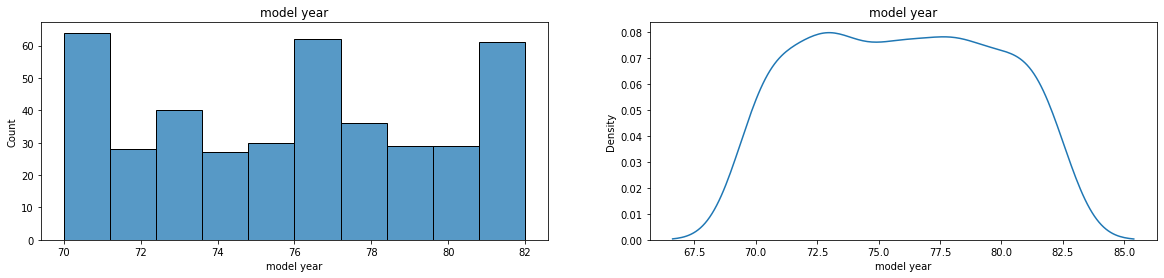

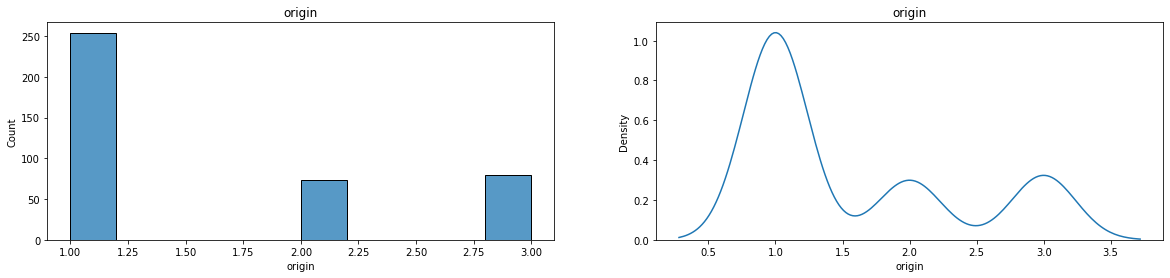

In [55]:
for i in df._get_numeric_data().columns:
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
  sns.histplot(df[i], bins=10, ax=axes[0], color='C0')
  axes[0].set_title(i)
  sns.kdeplot(df[i], ax=axes[1], color='C0')
  axes[1].set_title(i)
  plt.show()

## Correlation diagrams

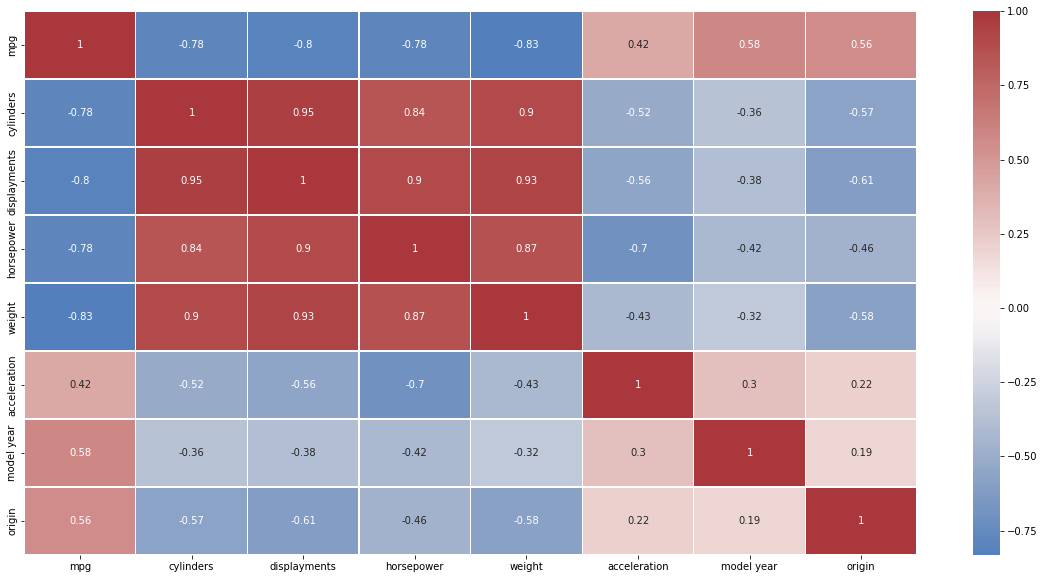

In [56]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, center=0,cmap="vlag",linewidths=0.4)
plt.show()

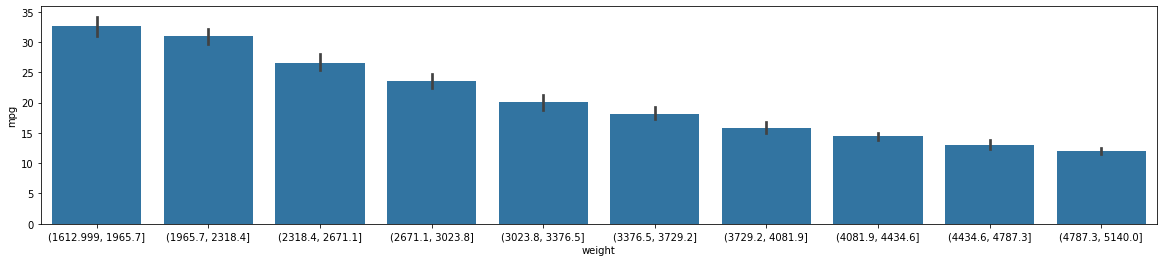

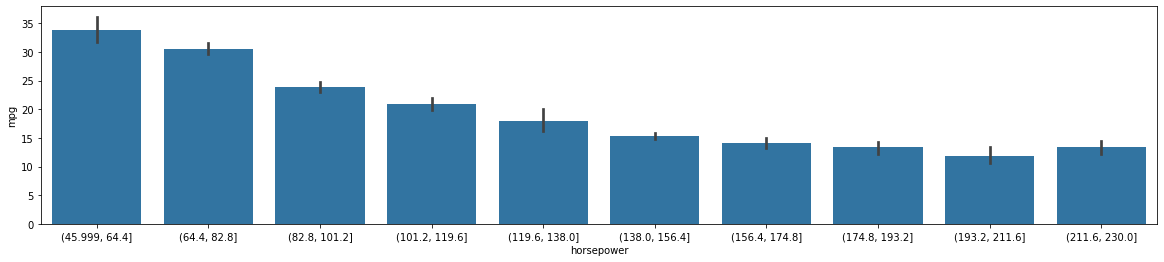

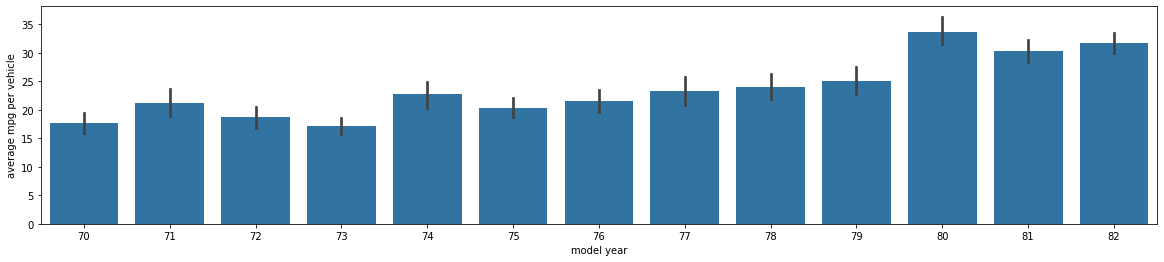

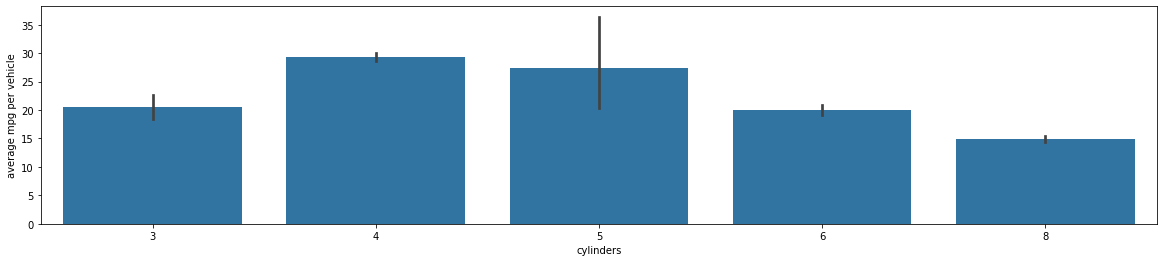

In [57]:
df['weight'] = df['weight'].astype(float)


for x in ['weight','horsepower','model year','cylinders']:
  if df[x].dtypes == float:
    bin_size=(df[x].max()-df[x].min())/10
    bins=[df[x].min()]
    for i in range(10):
      bins.append(bins[0]+(i+1)*bin_size)
  
    fig = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
    out = pd.cut(df[x], bins, include_lowest=True)
    sns.barplot(x=out, y='mpg',color='C0' , data=df)
  else:
    fig= plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
    sns.barplot(x=x, y='mpg',color='C0' , data=df)
    plt.ylabel('average mpg per vehicle')

  
  plt.show()

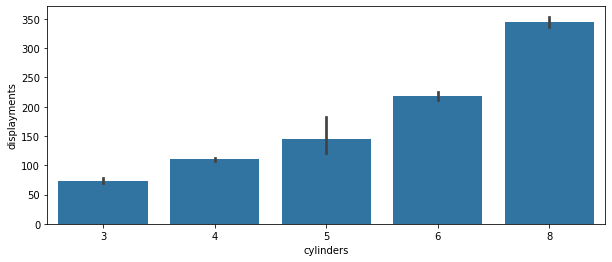

In [58]:
fig= plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
sns.barplot(x='cylinders', y='displayments', data=df, color='C0')
  
plt.show()

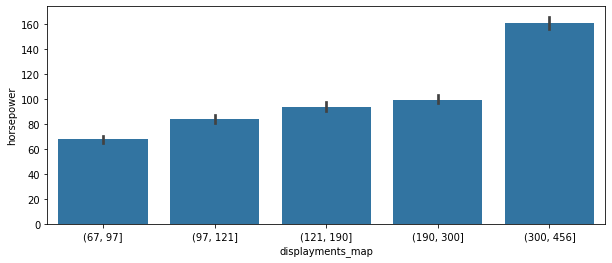

In [59]:
displayments_map = pd.cut(df['displayments'],bins=(67,97,121,190,300,456))  #μπορώ να βάλω bins=5
df2= pd.DataFrame({
    'displayments_map':displayments_map,
    'mpg':df['mpg']
})

#df2.groupby('displayments_map')['mpg'].count() check the bins

df2 = pd.concat([df2, df['horsepower']], axis=1)

fig = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
sns.barplot(x='displayments_map', y='horsepower', data=df2, color='C0')

plt.show()


# D03 Preprocessing

## Missing Values

**Check missing values**

In [60]:
df[df['mpg'].isnull()]

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4,133.0,115.0,3090.0,17.5,70,2,citroen ds-21 pallas
11,NaN,8,350.0,165.0,4142.0,11.5,70,1,chevrolet chevelle concours (sw)
12,NaN,8,351.0,153.0,4034.0,11.0,70,1,ford torino (sw)
13,NaN,8,383.0,175.0,4166.0,10.5,70,1,plymouth satellite (sw)
14,NaN,8,360.0,175.0,3850.0,11.0,70,1,amc rebel sst (sw)
17,NaN,8,302.0,140.0,3353.0,8.0,70,1,ford mustang boss 302
39,NaN,4,97.0,48.0,1978.0,20.0,71,2,volkswagen super beetle 117
367,NaN,4,121.0,110.0,2800.0,15.4,81,2,saab 900s


In [61]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
133,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
337,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
343,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
361,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
382,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [62]:
df.isna().sum()

mpg             8
cylinders       0
displayments    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

**Missing Values in mpg**

In [63]:
df_re_missing = df.dropna(axis = 0,subset=['mpg'])

**Missing Values in horsepower**

In [64]:
median_value = df_re_missing['horsepower'].median()
df_re_missing['horsepower'] =df_re_missing['horsepower'].fillna(median_value)

df_re_missing.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mpg             0
cylinders       0
displayments    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [65]:
df_prepro = df_re_missing.copy()

## Create car_company column from car name column

In [66]:
df_prepro['car_company'] = df_re_missing['car name'].apply(lambda x: x.split()[0])

In [67]:
df_prepro['car_company'].value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
volvo             6
vw                6
renault           5
opel              4
subaru            4
saab              4
chevy             3
bmw               2
maxda             2
mercedes-benz     2
cadillac          2
toyouta           1
vokswagen         1
triumph           1
hi                1
chevroelt         1
nissan            1
capri             1
mercedes          1
Name: car_company, dtype: int64

**Clean car_company column**

In [68]:
df_prepro.replace({'vokswagen': 'volkswagen',
            'vw': 'volkswagen', 
            'maxda': 'mazda', 
            'toyouta': 'toyota',
            'mercedes-benz': 'mercedes',
            'chevy': 'chevrolet',
            'chevroelt': 'chevrolet'}, inplace=True)

In [69]:
df_prepro['car_company'].nunique()

30

In [70]:
df_prepro.groupby('origin')['car_company'].nunique()

origin
1    13
2    11
3     6
Name: car_company, dtype: int64

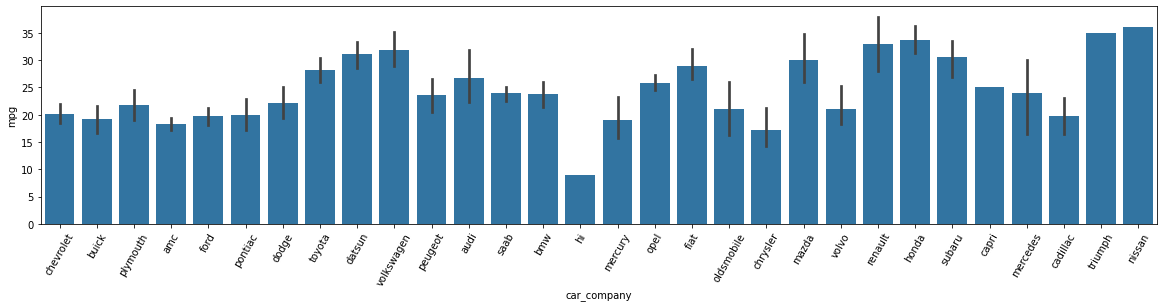

In [71]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
sns.barplot(x='car_company', y='mpg', data=df_prepro, color='C0')
plt.xticks(rotation=60)

plt.show()

## Check and handle outliers

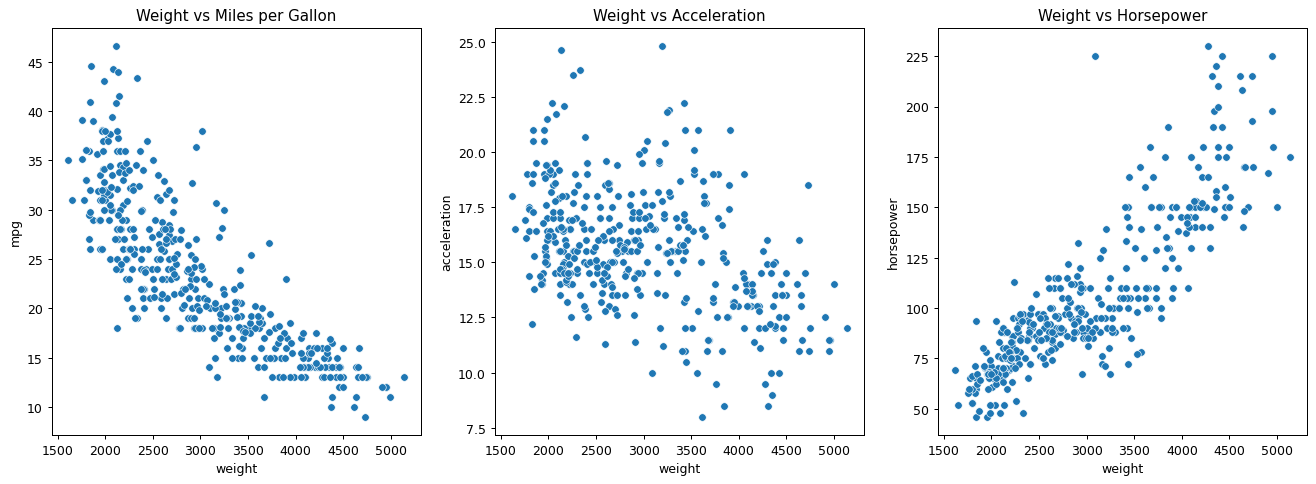

In [72]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.scatterplot(x="weight", y="mpg", data=df_prepro, ax=axes[0], color='C0')
axes[0].set_title("Weight vs Miles per Gallon")

sns.scatterplot(x="weight", y="acceleration", data=df_prepro, ax=axes[1], color='C0')
axes[1].set_title("Weight vs Acceleration")

sns.scatterplot(x="weight", y="horsepower", data=df_prepro,  ax=axes[2], color='C0')
axes[2].set_title("Weight vs Horsepower")

plt.show()

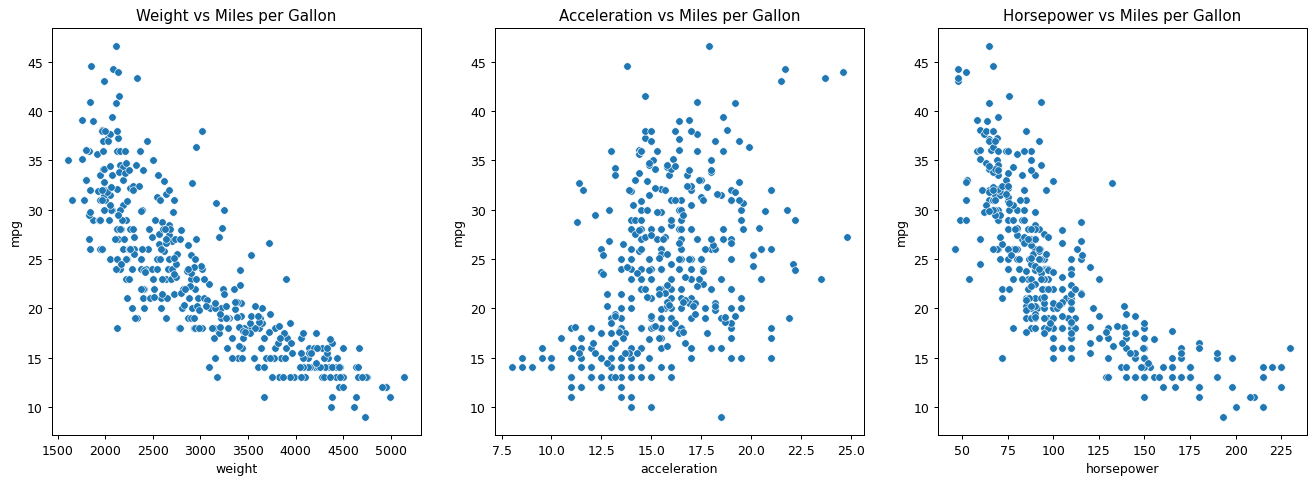

In [74]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.scatterplot(x="weight", y="mpg", data=df_prepro, ax=axes[0], color='C0')
axes[0].set_title("Weight vs Miles per Gallon")

sns.scatterplot(x="acceleration", y="mpg", data=df_prepro, ax=axes[1], color='C0')
axes[1].set_title("Acceleration vs Miles per Gallon")

sns.scatterplot(x="horsepower", y="mpg", data=df_prepro,  ax=axes[2], color='C0')
axes[2].set_title("Horsepower vs Miles per Gallon")

plt.show()

In [30]:
df_prepro.shape

(398, 10)

In [31]:
def outliers(df, col_name, q1=0.10, q3=0.90):
  quartile1 = df[col_name].quantile(q1)
  quartile3 = df[col_name].quantile(q3)
  IQR = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * IQR
  low_limit = quartile1 - 1.5 * IQR
  return df[(df[col_name]>=low_limit) & (df[col_name]<=up_limit)]

In [32]:
outliers(df_prepro,'acceleration').shape

(398, 10)

In [33]:
df_prepro = outliers(df_prepro,'acceleration')

In [34]:
outliers(df_prepro,'horsepower').shape

(398, 10)

In [35]:
df_prepro = outliers(df_prepro,'horsepower')

In [36]:
df_prepro = df_prepro.drop(columns='car name')

In [37]:
df_prepro

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car_company
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford
402,44.0,4,97.0,52.0,2130.0,24.6,82,2,volkswagen
403,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge
404,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford


**Replace Origin number with Origin name**

In [38]:
origin = df_prepro.pop('origin')
 
df_prepro['USA'] = (origin == 1)*1
df_prepro['Europe'] =(origin == 2)*1
df_prepro['Japan'] = (origin == 3)*1
df_prepro.tail()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,car_company,USA,Europe,Japan
401,27.0,4,140.0,86.0,2790.0,15.6,82,ford,1,0,0
402,44.0,4,97.0,52.0,2130.0,24.6,82,volkswagen,0,1,0
403,32.0,4,135.0,84.0,2295.0,11.6,82,dodge,1,0,0
404,28.0,4,120.0,79.0,2625.0,18.6,82,ford,1,0,0
405,31.0,4,119.0,82.0,2720.0,19.4,82,chevrolet,1,0,0


## Encoding Categorical features

In [39]:
df_prepro = pd.get_dummies(df_prepro)

In [40]:
df_prepro

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,USA,Europe,Japan,car_company_amc,car_company_audi,car_company_bmw,car_company_buick,car_company_cadillac,car_company_capri,car_company_chevrolet,car_company_chrysler,car_company_datsun,car_company_dodge,car_company_fiat,car_company_ford,car_company_hi,car_company_honda,car_company_mazda,car_company_mercedes,car_company_mercury,car_company_nissan,car_company_oldsmobile,car_company_opel,car_company_peugeot,car_company_plymouth,car_company_pontiac,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_triumph,car_company_volkswagen,car_company_volvo
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
402,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
403,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
404,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## MinMax Scaler

In [41]:
min_max_scaler = MinMaxScaler()
df_min_max_scaler = min_max_scaler.fit_transform(df_prepro)

In [42]:
df_min_max_scaler

array([[0.239, 1.   , 0.618, ..., 0.   , 0.   , 0.   ],
       [0.16 , 1.   , 0.729, ..., 0.   , 0.   , 0.   ],
       [0.239, 1.   , 0.646, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.612, 0.2  , 0.173, ..., 0.   , 0.   , 0.   ],
       [0.505, 0.2  , 0.134, ..., 0.   , 0.   , 0.   ],
       [0.585, 0.2  , 0.132, ..., 0.   , 0.   , 0.   ]])